# Name:- Shridhar Prabhudesai


# Sparks Foundation Data Science & Business Analytics Internship

# Grip Task 2

# Exploratory Data Analysis - Sports (IPL)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv("D:\Work\Grip\matches.csv")

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv("D:\Work\Grip\deliveries.csv")

deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

<AxesSubplot:xlabel='season', ylabel='count'>

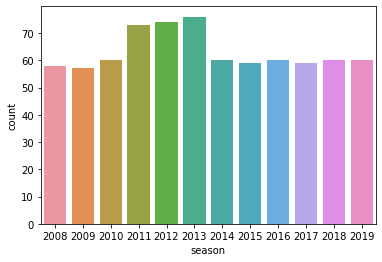

In [9]:
# total no of matches in every season

sns.countplot(x='season',data=matches)

<AxesSubplot:xlabel='count', ylabel='city'>

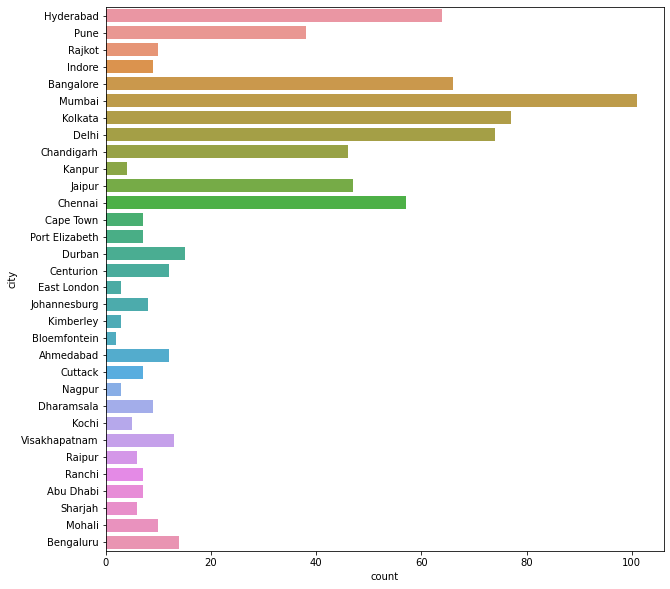

In [10]:
# city with highest matches played

plt.figure(figsize=(10, 10))
sns.countplot(y='city',data=matches)

<AxesSubplot:xlabel='count', ylabel='venue'>

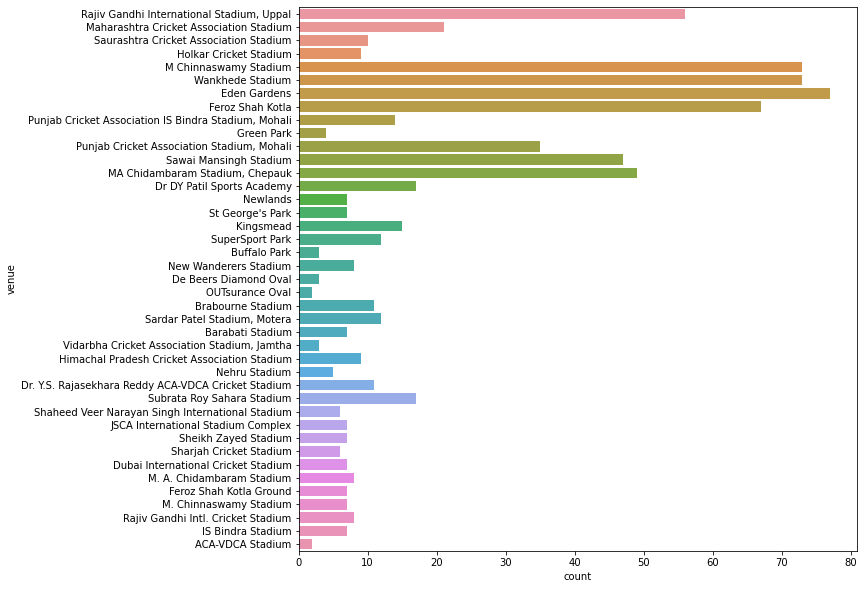

In [11]:
# veneue with highest matches played

plt.figure(figsize=(10, 10))
sns.countplot(y='venue',data=matches)

<AxesSubplot:xlabel='count', ylabel='toss_winner'>

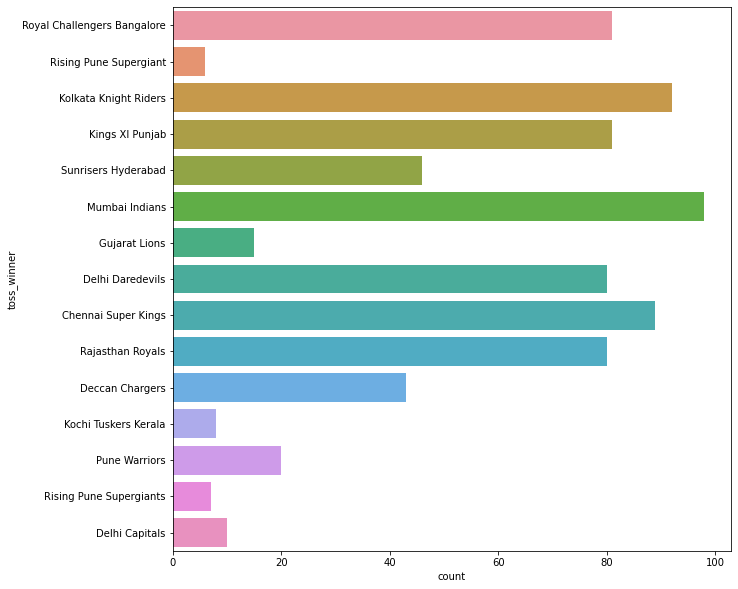

In [12]:
#teams with higest won tosses

plt.figure(figsize=(10, 10))
sns.countplot(y='toss_winner',data=matches)

<AxesSubplot:xlabel='count', ylabel='winner'>

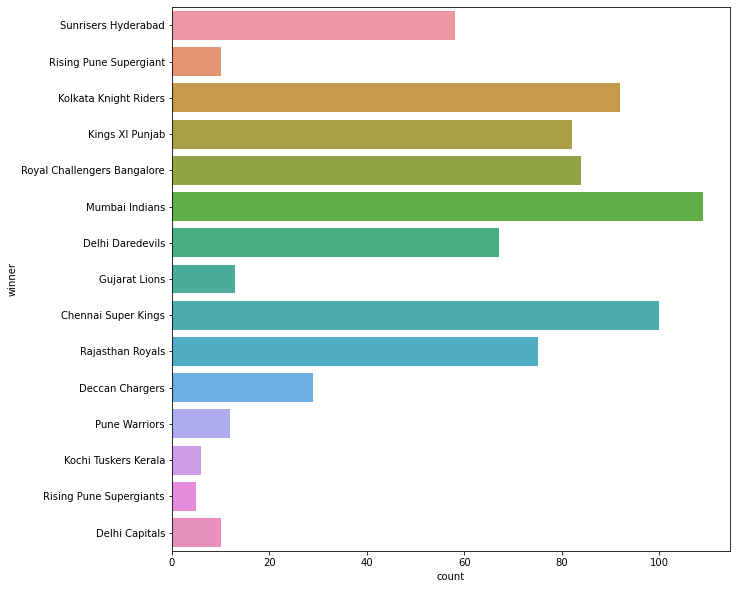

In [13]:
#teams with most wins

plt.figure(figsize=(10, 10))
sns.countplot(y='winner',data=matches)

In [14]:
mom=list(matches['player_of_match'].unique())
pay_mom=list(matches['player_of_match'])
d=dict()

for i in mom:
        d[i]=0

for i in pay_mom:
    d[i]+=1

mx=max(d.values())
mi=min(d.values())

val=list(d.values())
key=list(d.keys())

mxi=val.index(mx)
mii=val.index(mi)

print("Player with maximum man of the match awards is",key[mxi],mx)

Player with maximum man of the match awards is CH Gayle 21


In [15]:
wins_per_season = matches.groupby("season")["winner"].value_counts()
wins_per_season


season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [16]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

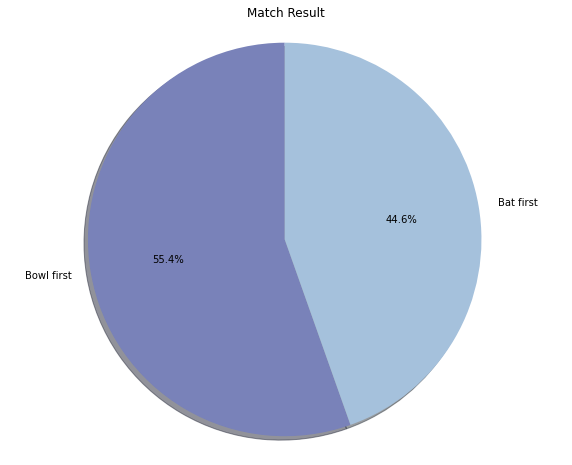

In [17]:
Win=matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#7982B9', '#A5C1DC']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result')
plt.axis('equal')
plt.show()

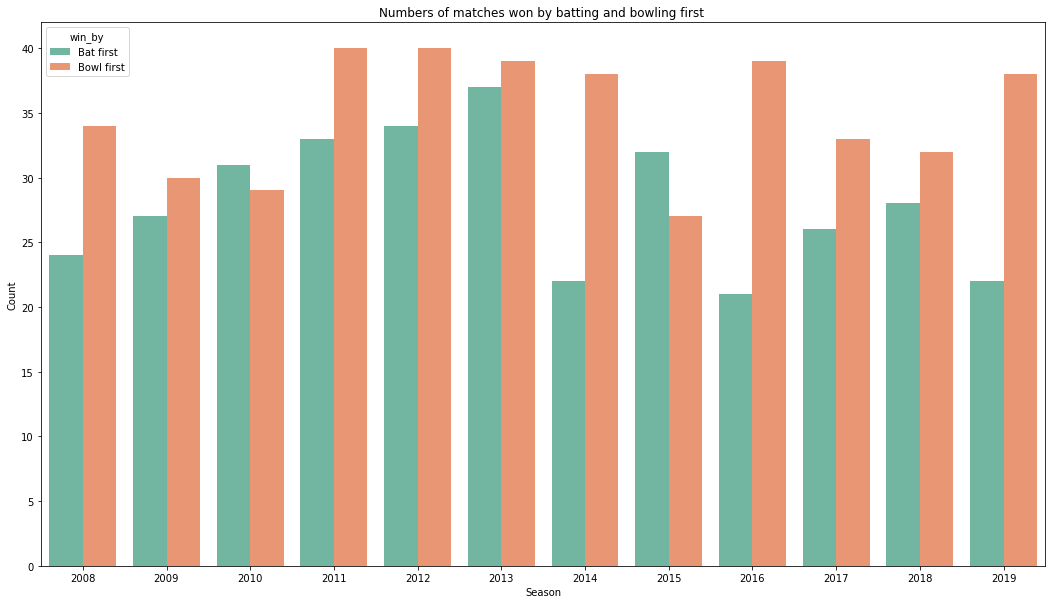

In [18]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=matches,palette='Set2')
plt.title("Numbers of matches won by batting and bowling first ")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

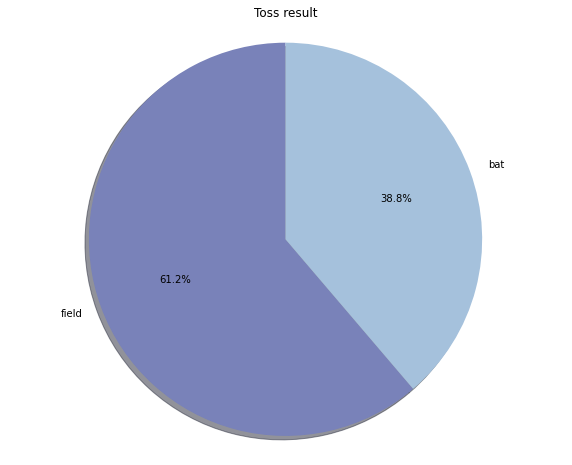

In [19]:
# we will plot pie chart on Toss decision
Toss=matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#7982B9', '#A5C1DC']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result')
plt.axis('equal')
plt.show()

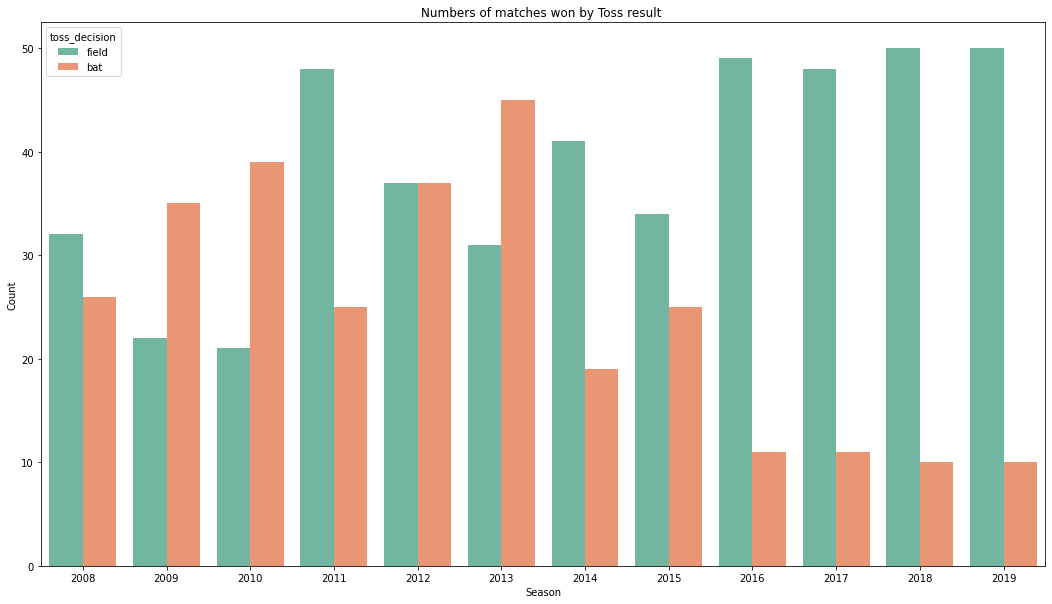

In [20]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=matches,palette='Set2')
plt.title("Numbers of matches won by Toss result ",)
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

In [21]:
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
#final_matches.insert(2, column = "against", value = '')  

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')



,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


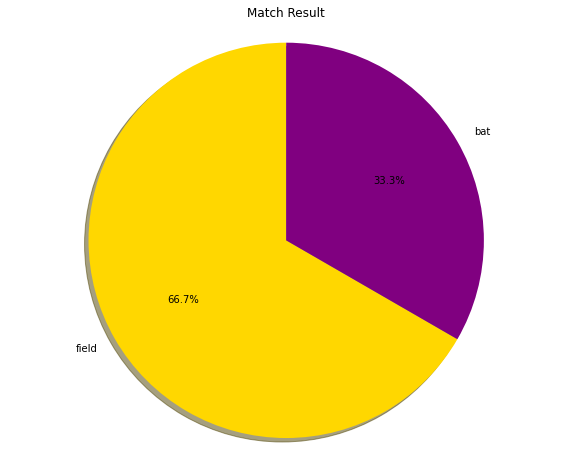

In [22]:
# we will plot pie chart on Winning percentage in final wrt toss win
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result')
plt.axis('equal')
plt.show()

In [23]:
# We will print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [24]:
# we will print number of season won by teams


final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

In [25]:
# we will print toss winner, toss decision, winner in final matches.

final_matches[['season','toss_winner','toss_decision','winner']].sort_values('season').reset_index(drop=True)

,season,toss_winner,toss_decision,winner
0,2008,Rajasthan Royals,field,Rajasthan Royals
1,2009,Royal Challengers Bangalore,field,Deccan Chargers
2,2010,Chennai Super Kings,bat,Chennai Super Kings
3,2011,Chennai Super Kings,bat,Chennai Super Kings
4,2012,Chennai Super Kings,bat,Kolkata Knight Riders
5,2013,Mumbai Indians,bat,Mumbai Indians
6,2014,Kolkata Knight Riders,field,Kolkata Knight Riders
7,2015,Chennai Super Kings,field,Mumbai Indians
8,2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad
9,2017,Mumbai Indians,bat,Mumbai Indians


In [26]:
# we will print man of the match
final_matches[['season','player_of_match']].sort_values('season').reset_index(drop=True)


,season,player_of_match
0,2008,YK Pathan
1,2009,A Kumble
2,2010,SK Raina
3,2011,M Vijay
4,2012,MS Bisla
5,2013,KA Pollard
6,2014,MK Pandey
7,2015,RG Sharma
8,2016,BCJ Cutting
9,2017,KH Pandya


In [27]:
season_data=matches[['id','season','winner']]

bowling_data=deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [28]:
# we will print numbers of fours hit by team
four_data=bowling_data[bowling_data['batsman_runs']==4]

four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')]).sort_values('runs by fours',ascending=False)


,runs by fours,fours
batting_team,,
Mumbai Indians,10352,2588
Kings XI Punjab,9832,2458
Kolkata Knight Riders,9736,2434
Royal Challengers Bangalore,9440,2360
Chennai Super Kings,8772,2193
Delhi Daredevils,8632,2158
Rajasthan Royals,8140,2035
Sunrisers Hyderabad,5776,1444
Deccan Chargers,3828,957


In [29]:
# print no of sixes hit by team

six_data=bowling_data[bowling_data['batsman_runs']==6]

six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')]).sort_values('runs by six',ascending=False)

,runs by six,sixes
batting_team,,
Royal Challengers Bangalore,6792,1132
Mumbai Indians,6576,1096
Kings XI Punjab,5856,976
Chennai Super Kings,5838,973
Kolkata Knight Riders,5580,930
Delhi Daredevils,4806,801
Rajasthan Royals,4086,681
Sunrisers Hyderabad,3198,533
Deccan Chargers,2400,400


<AxesSubplot:xlabel='four', ylabel='batsman'>

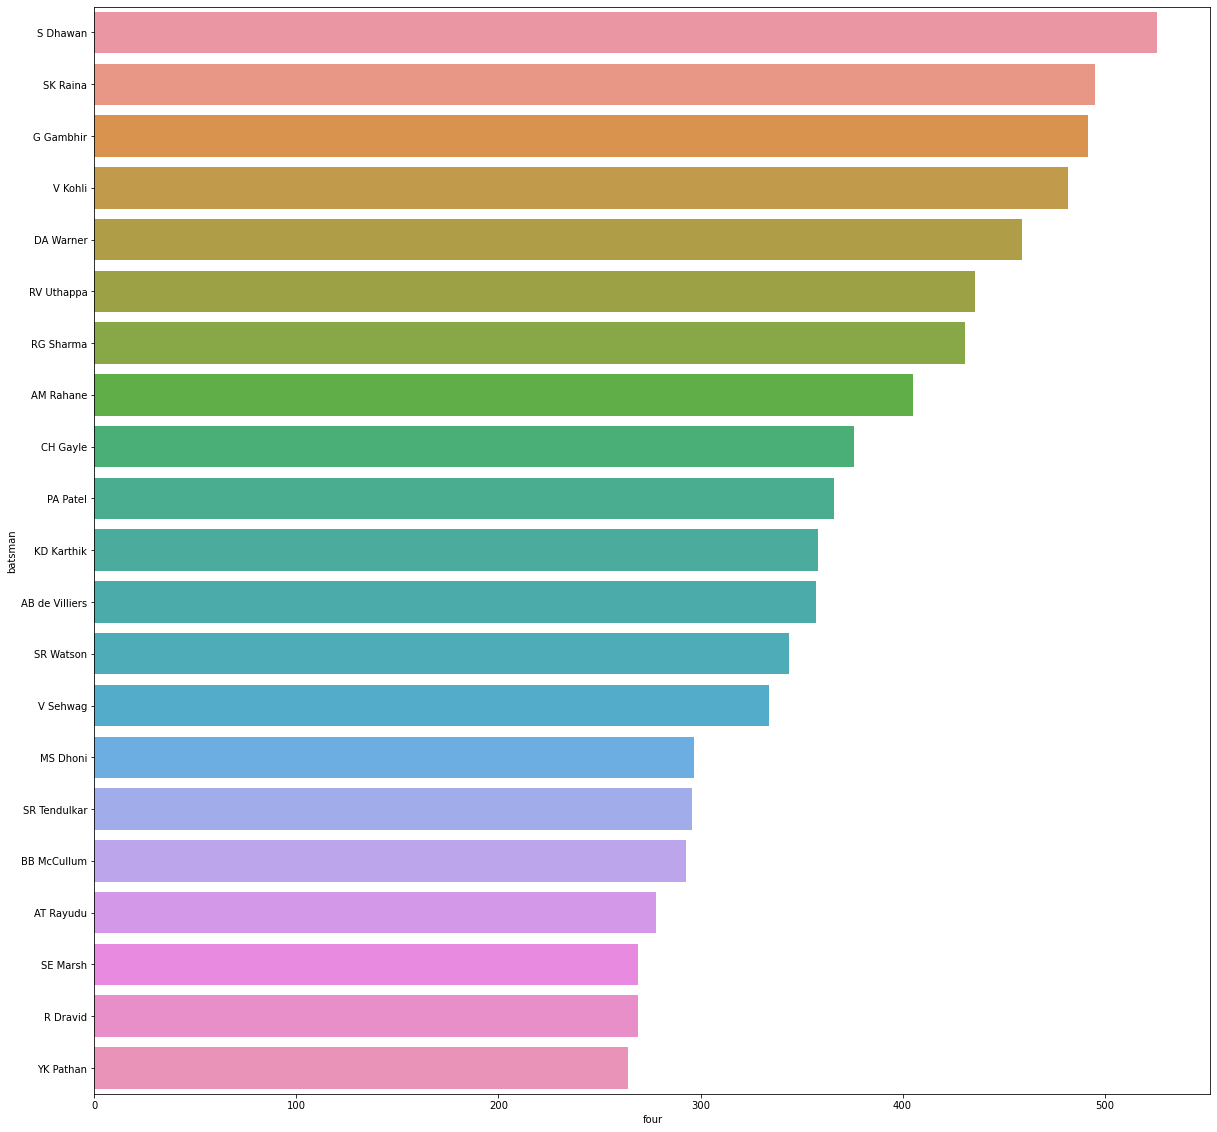

In [30]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=False)
batsman_four=batsman_four.iloc[:21:]

plt.figure(figsize=(20,20))
sns.barplot(y=batsman_four['batsman'],x=batsman_four['four'])

<AxesSubplot:xlabel='six', ylabel='batsman'>

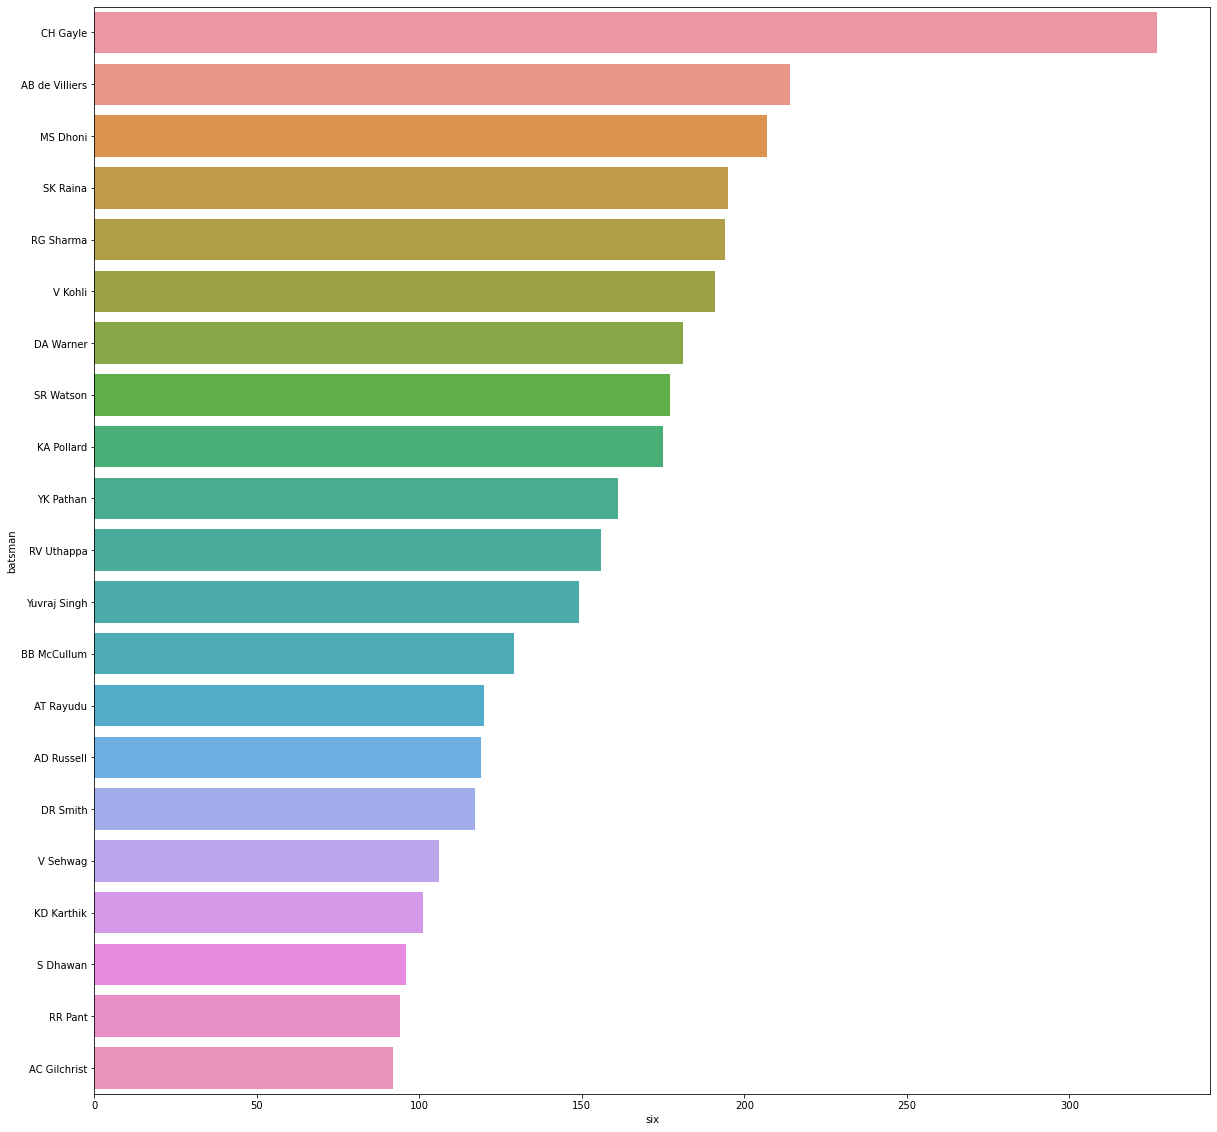

In [31]:
six_data=bowling_data[bowling_data['batsman_runs']==6]

batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=False)
batsman_six=batsman_six.iloc[:21:]

plt.figure(figsize=(20,20))
sns.barplot(y=batsman_six['batsman'],x=batsman_six['six'])

<AxesSubplot:xlabel='season', ylabel='four'>

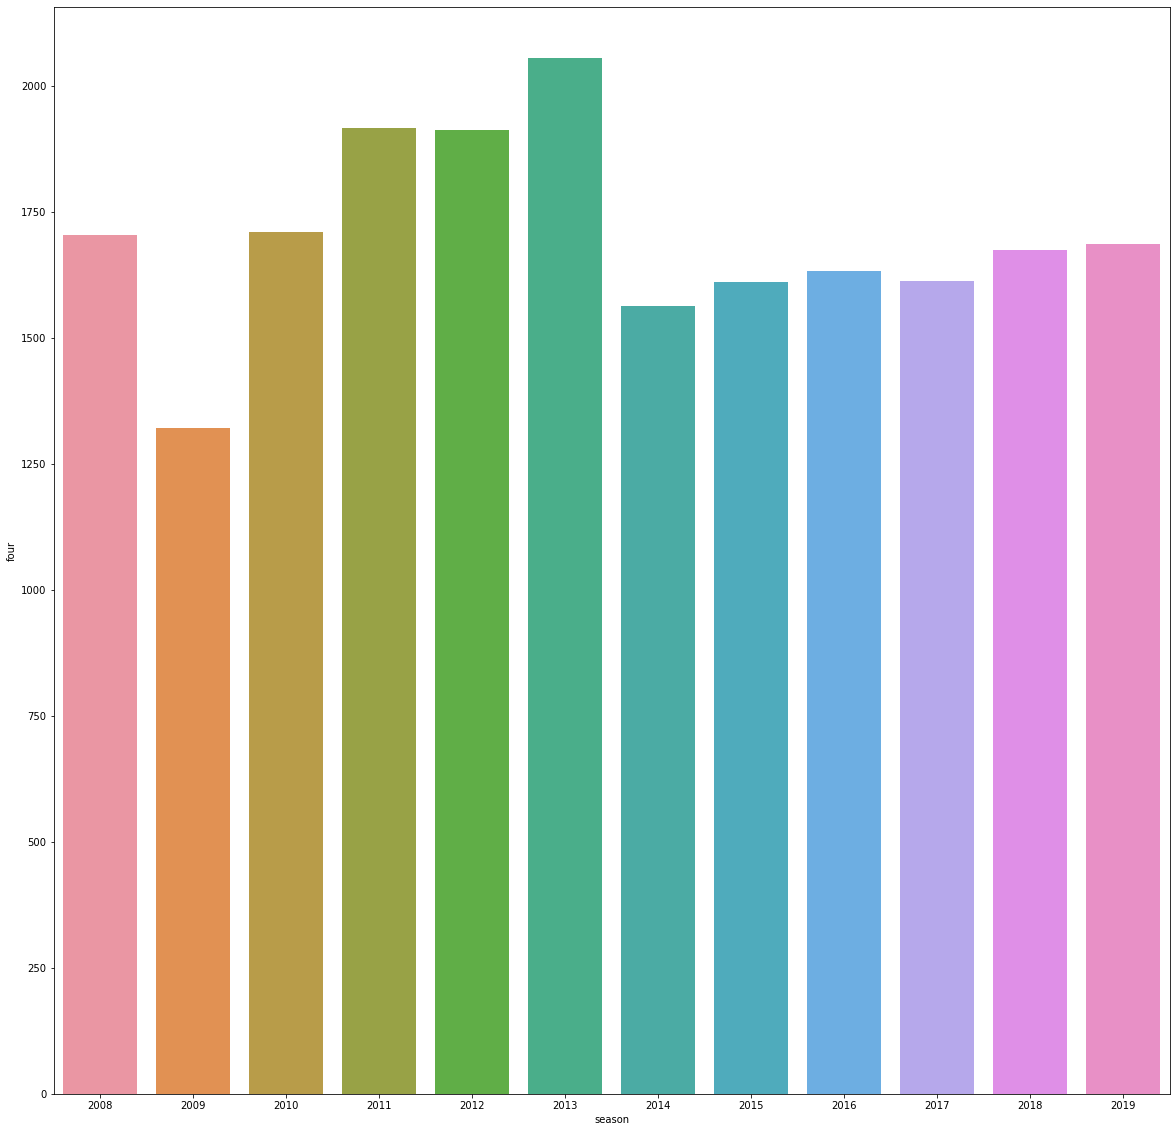

In [32]:
season_four=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=False)
season_four=season_four.iloc[:21:]

plt.figure(figsize=(20,20))
sns.barplot(x=season_four['season'],y=season_four['four'])

<AxesSubplot:xlabel='season', ylabel='six'>

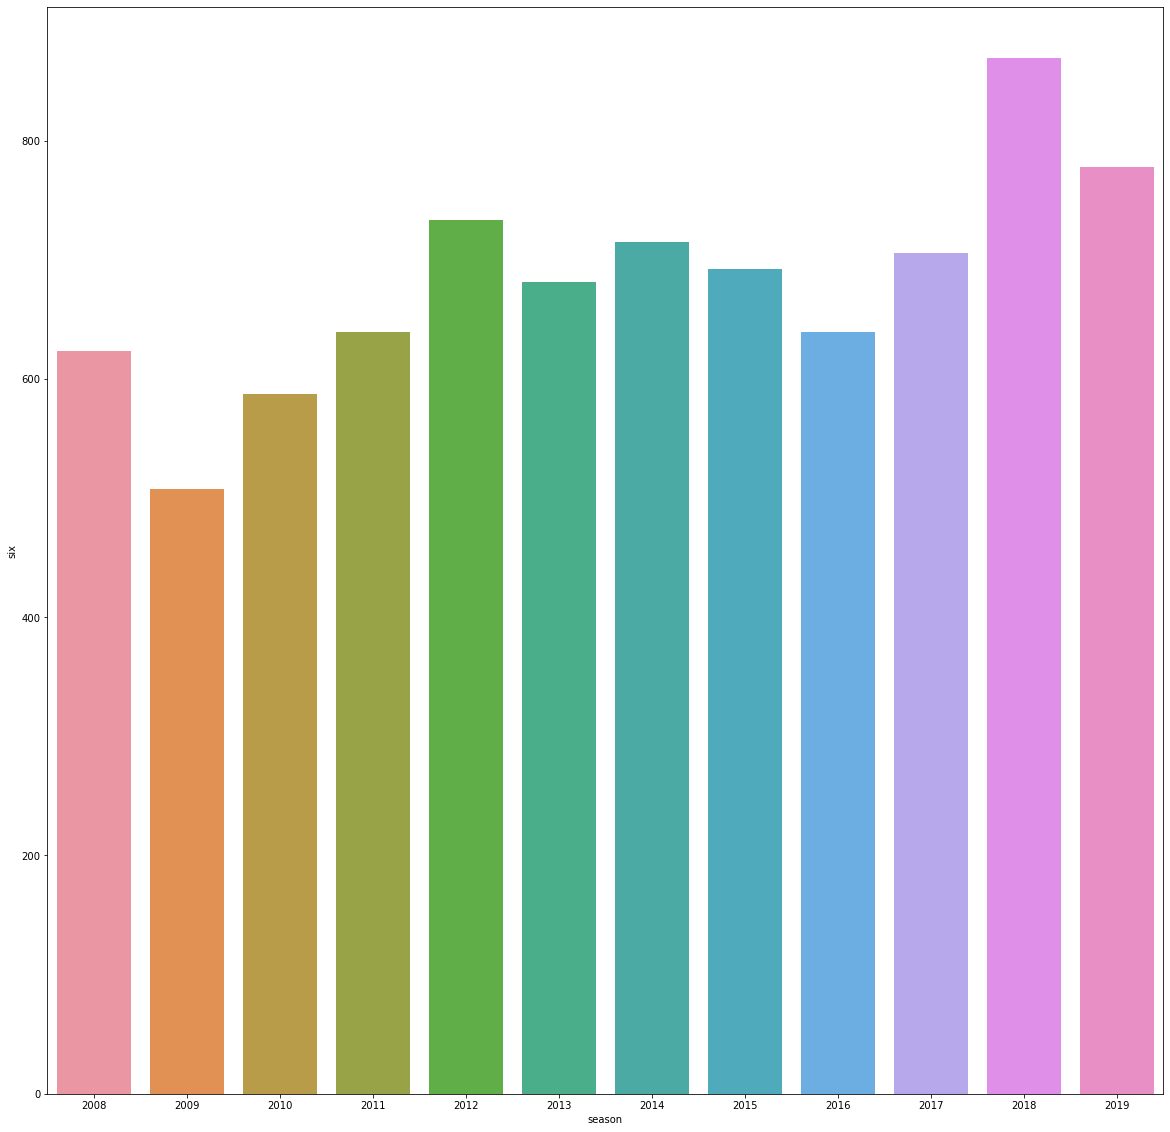

In [33]:
season_six=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=False)
season_six=season_six.iloc[:21:]

plt.figure(figsize=(20,20))
sns.barplot(x=season_six['season'],y=season_six['six'])

In [34]:
# the top 10 leading run scorer in IPL
batsman_score=bowling_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})

print("______Top 10 Leading Run Scorer in IPL___________")
batsman_score.iloc[:10,:]

______Top 10 Leading Run Scorer in IPL___________


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


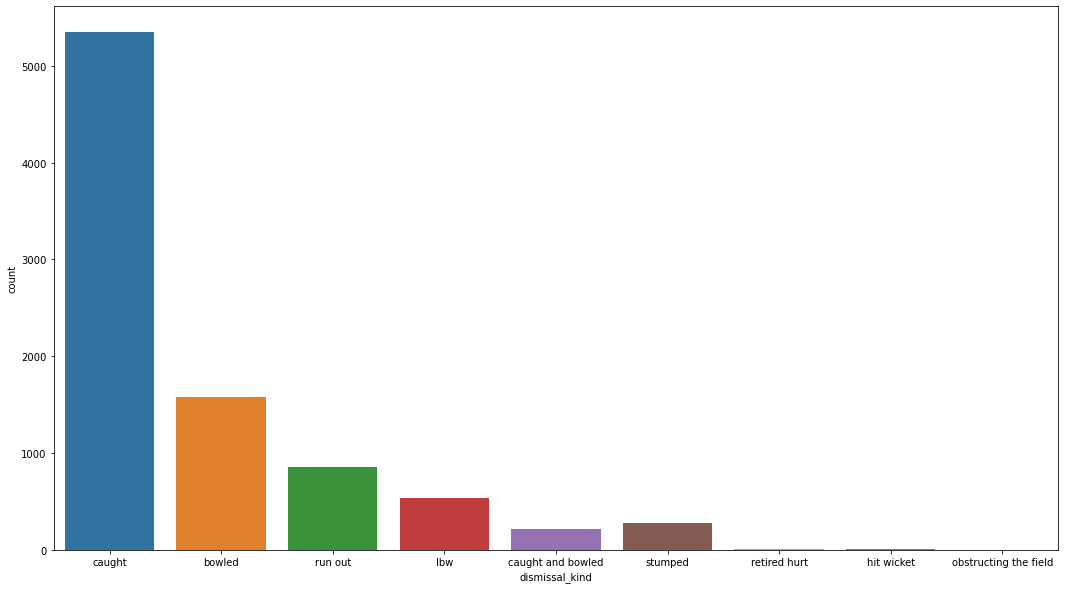

In [35]:

# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(deliveries.dismissal_kind)

In [36]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])

wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [37]:
# we will print ipl most wicket taking bowlers

top20=wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True)
top20.head(20)

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


<AxesSubplot:xlabel='count', ylabel='bowler'>

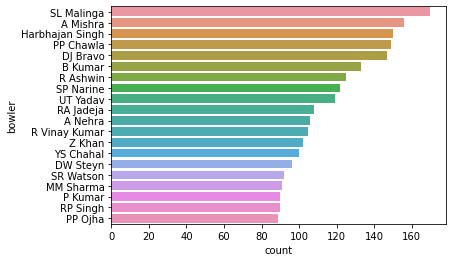

In [38]:
sns.barplot(top20['count'].head(20),top20['bowler'].head(20),)